In [1]:
import pandas as pd
pd.set_option('display.max_columns',10)
pd.set_option('display.width',350)

In [2]:
data=pd.read_csv("tbd")
print(data.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


In [3]:
#Descriptive Stats
print(data.describe())

                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


In [4]:
print(data.groupby(['country']).size())

country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64


In [6]:
print(data.isna().sum())

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64


In [5]:
print(data.groupby(['source']).size())

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64


In [7]:
#Observations
#there are no missing values.
#The user base is pretty young, average 30 yrs.
#The site is probably a US site, though it has large China users as well
#Max age is 123 seems off

In [8]:
print(sorted(data['age'].unique(),reverse=True))

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


In [9]:
print(data[data['age']>110])

        country  age  new_user source  total_pages_visited  converted
90928   Germany  123         0    Seo                   15          1
295581       UK  111         0    Ads                   10          1


In [ ]:
#There are two users, we can remove them 

In [10]:
data=data[data['age']<110]

In [ ]:
#Visualization the data 

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [13]:
rcParams.update({'figure.autolayout': True})

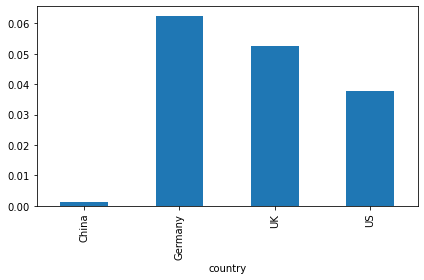

In [14]:
data.groupby(['country'])['converted'].mean().plot.bar()
plt.show()

In [ ]:
#Chinese convert at a mmuch lower rate than other countries

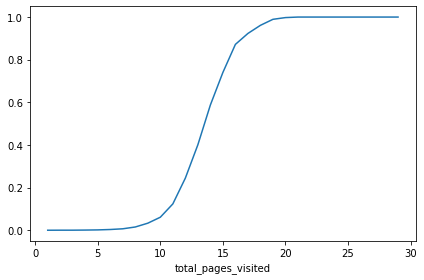

In [16]:
data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

In [ ]:
#spending more time on the site implies higher probability of converstion

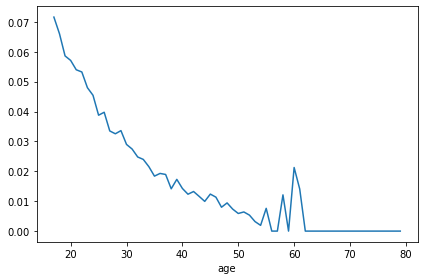

In [22]:
data.groupby(['age'])['converted'].mean().plot()
plt.show()

In [23]:
#younger user tend to have higher conversion

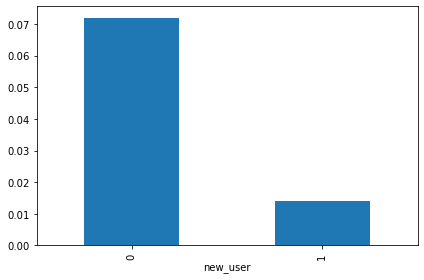

In [24]:
data.groupby(['new_user'])['converted'].mean().plot.bar()
plt.show()

In [ ]:
#non-new user tends to have a higher conversion

In [ ]:
#I am going to pick a random forest to predict conversion rate. Because it usually requires very little time to optimize it.
#and it is strong with outliers, irrelevant variables, continuous and discrete variables.

In [25]:
#1.Create dummy variables from the categorical ones:
data_dummy=pd.get_dummies(data,drop_first=True)

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(123)

In [29]:
#split into train and test
train,test=train_test_split(data_dummy,test_size=0.2)

In [31]:
#build the model
rf=RandomForestClassifier(n_estimators=100,max_features=3,oob_score=True)
rf.fit(train.drop('converted',axis=1),train['converted'])

RandomForestClassifier(max_features=3, oob_score=True)

In [33]:
#print OOB accuracy and confusion matrix
print('OOB accuracy is',rf.oob_score_,'\n','OOB Confusion 
      Matrix','\n',pd.DataFrame(confusion_matrix(train['converted'],rf.oob_decision_function_[:,1].round(),labels=[0,1])))

OOB accuracy is 0.9842424434095779 
 OOB Confusion Matrix 
         0     1
0  243433  1296
1    2690  5539


In [ ]:
#out of bag score,the OOB score is computed as the number of correctly predicted rows from the out of bag sample.

In [ ]:
#lets print test accuracy and confusion matrix


In [38]:
print(
"Test accuracy is", rf.score(test.drop('converted', axis=1),test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['converted'], rf.predict(test.drop('converted', axis=1)), labels=[0, 1]))
)

Test accuracy is 0.9850885515496521 
 Test Set Confusion Matrix 
        0     1
0  60953   318
1    625  1344


In [ ]:
#checking variable importance

In [40]:
feat_importances=pd.Series(rf.feature_importances_,index=train.drop('converted',axis=1).columns)

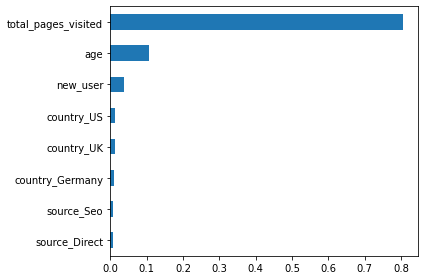

In [41]:
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [ ]:
#since total_pages_visited is not actionable, we drop it and rebuild the model

In [43]:
x_train=train.drop(['converted','total_pages_visited'],axis=1)
y_train=train['converted']
x_test=test.drop(['converted','total_pages_visited'],axis=1)
y_test=test['converted']

In [44]:
rf=RandomForestClassifier(n_estimators=100,max_features=3,oob_score=True,class_weight={0:1,1:10})

In [46]:
rf.fit(x_train,y_train)
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_train, rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.8865859154484144 
 OOB Confusion Matrix 
         0      1
0  220530  24199
1    4490   3739


In [47]:
print(
"Test accuracy is", rf.score(x_test,y_test), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_test, rf.predict(x_test), labels=[0, 1]))
)

Test accuracy is 0.88983238456673 
 Test Set Confusion Matrix 
        0     1
0  55333  5938
1   1029   940


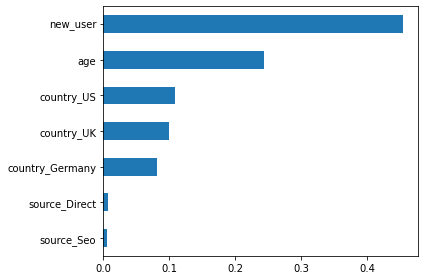

In [48]:
#recheck variable importance
feat_importances = pd.Series(rf.feature_importances_, index=train.drop(['converted', 'total_pages_visited'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [ ]:
#check partial dependence plots for the 4 vars

In [52]:
#conda install -c conda-forge pdpbox 


Solving environment: done

## Package Plan ##

  environment location: /Users/nabai/opt/anaconda3

  added / updated specs:
    - pdpbox


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38h50d1736_0         3.1 MB  conda-forge
    pdpbox-0.2.1               |     pyhd8ed1ab_0        22.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        25.2 MB

The following NEW packages will be INSTALLED:

  pdpbox             conda-forge/noarch::pdpbox-0.2.1-pyhd8ed1ab_0

The following packages will be UPDATED:

  conda                                4.9.2-py38h50d1736_0 --> 4.10.3-py38h50d1736_0



pdpbox-0.2.1         | 22.2 MB   | ##################################### | 100% 
conda-4.10.3         | 3.1 MB    | ##################################### | 100% 
Preparing transaction: 

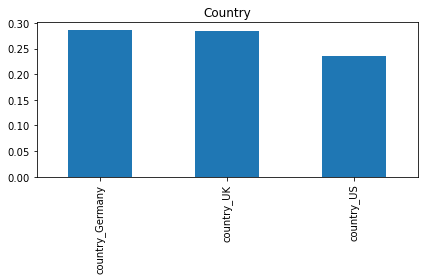

In [53]:

from pdpbox import pdp,info_plots

pdp_iso=pdp.pdp_isolate(model=rf,dataset=train.drop(['converted', 'total_pages_visited'], axis=1),model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)),feature=
                       ['country_Germany','country_UK','country_US'],num_grid_points=50)
pdp_dataset=pd.Series(pdp_iso.pdp,index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar',title='Country')
plt.show()

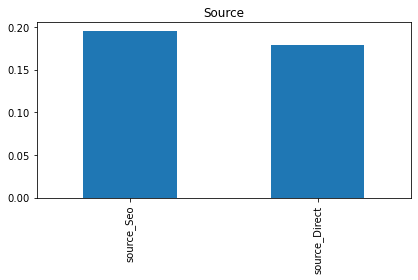

In [54]:
#source
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature=['source_Direct', 'source_Seo'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Source')
plt.show()

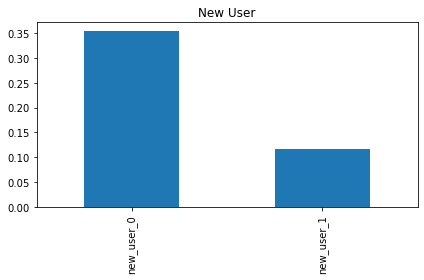

In [55]:
#new user
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature='new_user', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='New User')
plt.show()

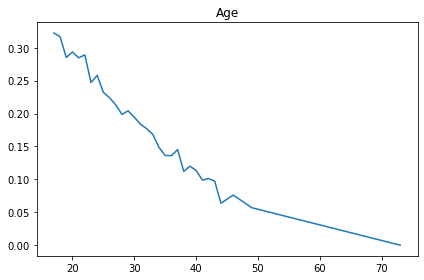

In [56]:
#age
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature='age', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Age')
plt.show()

In [ ]:
conda install -c anaconda graphviz 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ 

In [64]:
#Visualize decision tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
tree = DecisionTreeClassifier(max_depth-2,class_weight={0:1,1:10},min_impurity_decrease=0.001)
tree.fit(x_train,y_train)
export_graphviz(tree,out_file='tree_conversion.dot',feature_names=x_train.columns,proportion=True, rotate=True)

In [ ]:
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()

In [ ]:
#conclusions and next steps: